## Importando as Bibliotecas

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from scipy.stats import kurtosis
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt,het_white
from statsmodels.stats.diagnostic import linear_harvey_collier, linear_reset, spec_white
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from yellowbrick.regressor import CooksDistance
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from sklearn.linear_model import LinearRegression


### Leitura da base de dados

In [46]:
cerveja_Df = pd.read_csv('Consumo_cerveja.csv')

## Informações básicas da base

In [47]:
print(cerveja_Df.isna().sum())

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64


Os dados ja estão limpos, então não ha necessidade de se atentar a pré tratamentos relacionados a Not a Numbers.

## Fazer a leitura das 5 primeiras linhas e dos tipos de cada variável.

In [48]:
display(cerveja_Df.head(5))
print(cerveja_Df.dtypes)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


Data                            object
Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                  int64
Consumo de cerveja (litros)    float64
dtype: object


Com os tipos das variáveis adequados e com o pré processamento e limpeza dos dados feitos, podemos partir para a implementação do modelo com base no step-by-step do modelo.


### É importante observar as correlações entre variáveis. Então, é o que buscaremos observar na tabela de correlação abaixo

In [49]:
display(cerveja_Df.corr())

<ipython-input-49-638feb1e4588>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(cerveja_Df.corr())


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


#### Tabela descritiva das variáveis (colunas)

In [50]:
display(cerveja_Df.describe())

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


Com a tabela, é possível ter uma boa noção de como esta se distribuindo os dados, além do número total de observações 365, e 7 colunas. Além da média dos valores e etc...

#### Para observar o comportamento e comparar as temperaturas, plotaremos um gráfico das temperaturas média, máxima e mínima em graus Celsius.

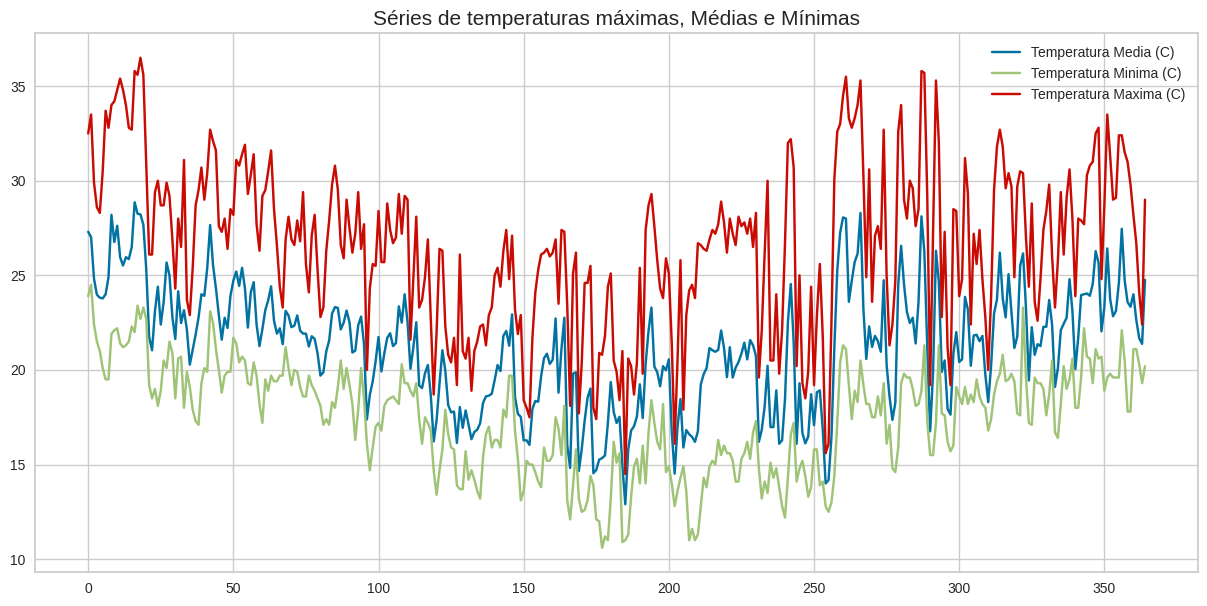

In [51]:
cerveja_Df[['Temperatura Media (C)',
         'Temperatura Minima (C)',
         'Temperatura Maxima (C)']].plot(figsize=(15,7));
plt.title('Séries de temperaturas máximas, Médias e Mínimas', size=15);

### Precipitação diária

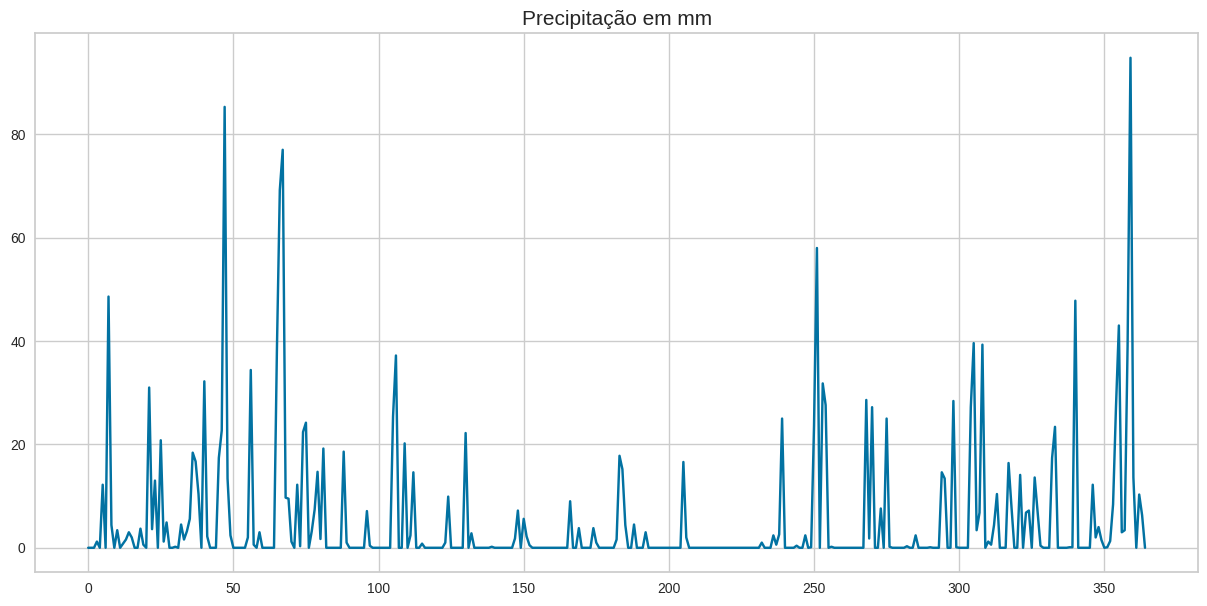

In [52]:
cerveja_Df['Precipitacao (mm)'].plot(figsize=(15,7))
plt.title('Precipitação em mm',size=15);

#### Consumo de cerveja

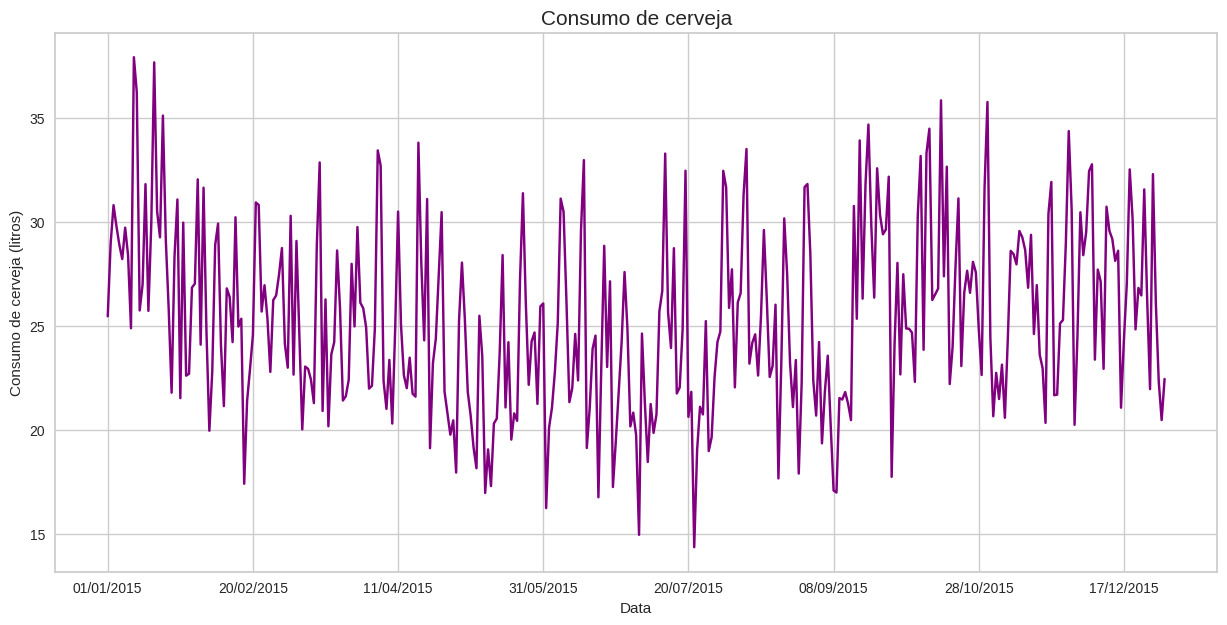

In [53]:
cerveja_Df.set_index('Data')['Consumo de cerveja (litros)'].plot(figsize=(15, 7), color='purple')
plt.title('Consumo de cerveja', size=15)
plt.xlabel('Data')
plt.ylabel('Consumo de cerveja (litros)')
plt.show()

#### Com o objetivo de identificar mais fácilmente a correlação das variáveis, plotaremos um gráfico de correlação de Pearson. Em resumo um gráfico de correlação de Pearson é ultilizado para observar as correlações lineares de variáveis contínuas. O que claramente é o nosso caso.

<ipython-input-54-996e7b9fe84e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cerveja_Df.corr(), annot = True, cmap= "RdYlGn");


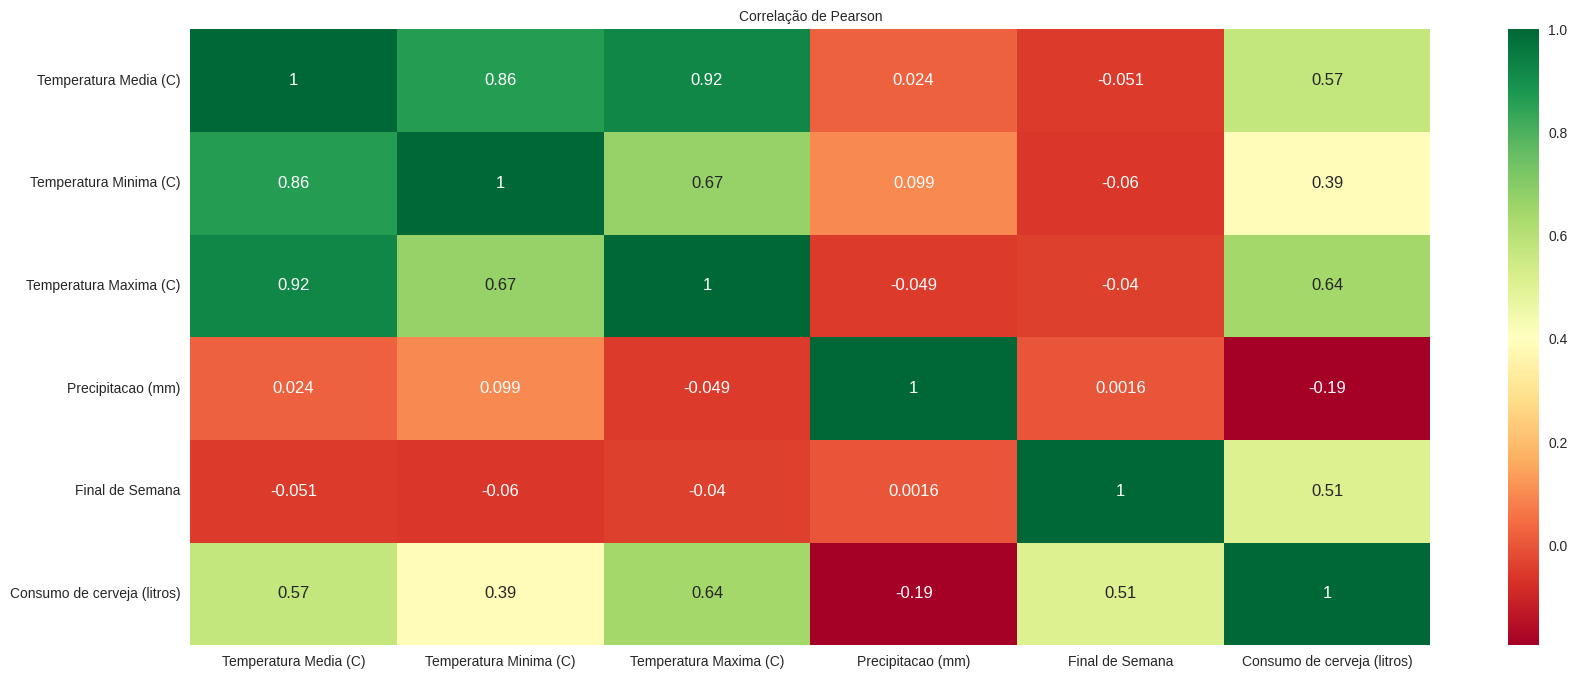

In [54]:
plt.figure(figsize=(20,8))
sns.heatmap(cerveja_Df.corr(), annot = True, cmap= "RdYlGn");
plt.title('Correlação de Pearson',size=10);

Para verificar se existe valores extremos, ou outliers. Ultilizaremos o box plot abaixo:

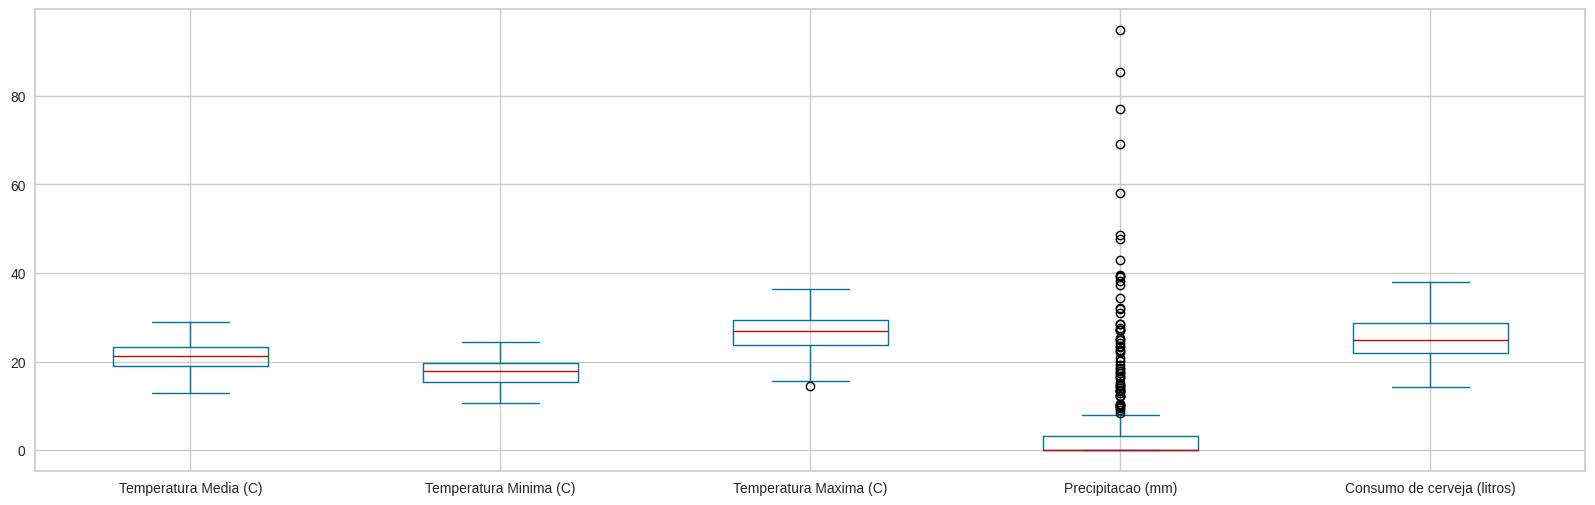

In [55]:
cerveja_Df[['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)',
       'Consumo de cerveja (litros)']].plot.box(figsize=(20,6));

#### Histograma das variáveis

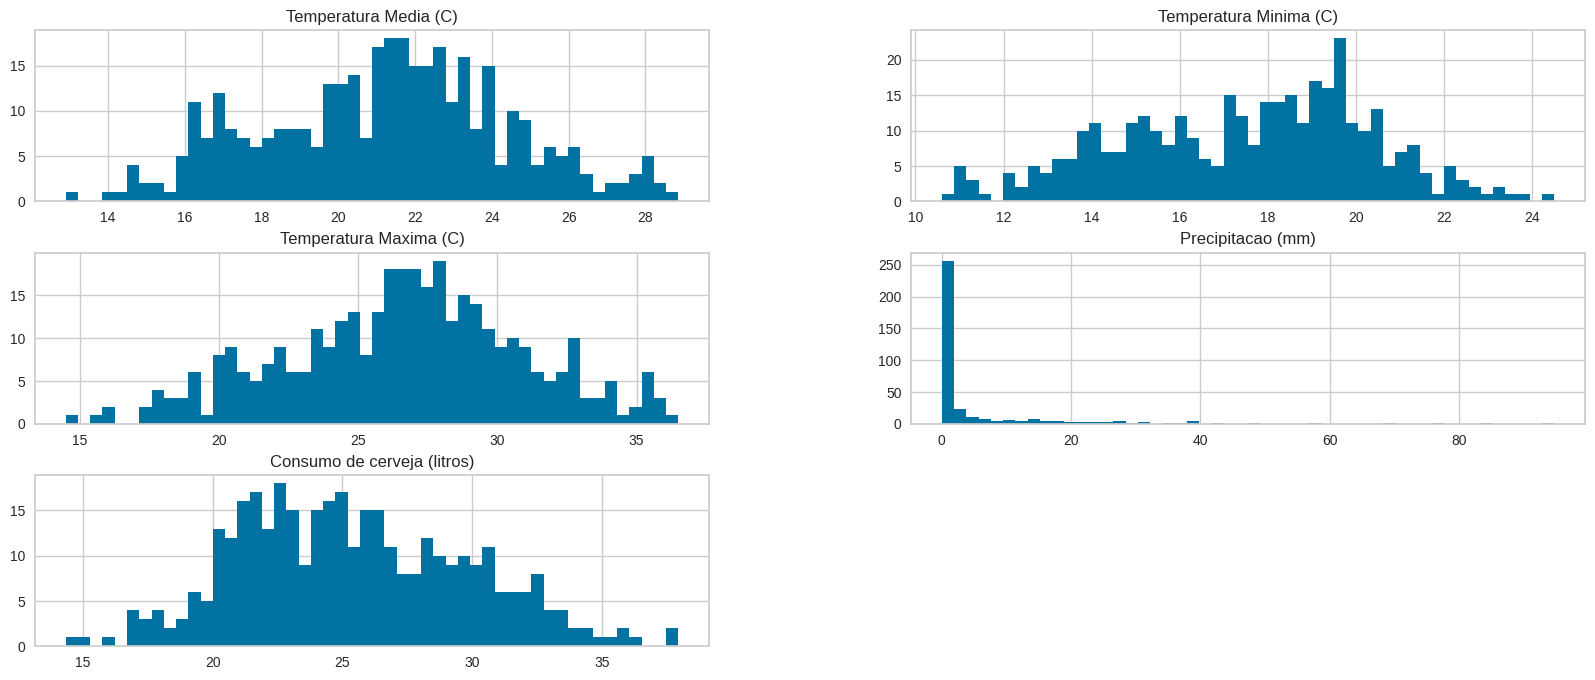

In [56]:
cerveja_Df[['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)',
       'Consumo de cerveja (litros)']].hist(figsize=(20,8), bins=50);

## Regressão Linear Multipla em Python

Existem diferentes formas de realizar o modelo de regressão linear em python, com bibliotecas específicas. Para esta aplicação realizaremos com a bibloteca Statsmodels, por conta de para mim ser a mais completa para esta operação.

### Separação da variaveis idependentes da dependente

In [57]:
#Variáveis independentes
X = cerveja_Df.drop(['Consumo de cerveja (litros)','Data'],axis=1)
#Variável dependentes
y = cerveja_Df['Consumo de cerveja (litros)']

### Gerando o modelo com Statsmodels
Nessa etapa são gerado dois modelos com e sem intercepto. A presença do interceptou ou não, causa mudanças siginificativas nas estatísticas geradas.

In [58]:
modelo1 = (sm.OLS(y,sm.add_constant(X)).fit())
display(modelo1.summary(title='Sumário do modelo com intercepto'))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Sumário do modelo com intercepto                           
=======================================================================================
Dep. Variable:     Consumo de cerveja (litros)   R-squared:                       0.723
Model:                                     OLS   Adj. R-squared:                  0.719
Method:                          Least Squares   F-statistic:                     187.1
Date:                         Sun, 29 Oct 2023   Prob (F-statistic):           1.19e-97
Time:                                 17:58:46   Log-Likelihood:                -824.07
No. Observations:                          365   AIC:                             1660.
Df Residuals:                              359   BIC:                             1684.
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.4447      0.845      7.627      0.000       4.783       8.107
Temperatura Media (C)      0.0308      0.188      0.164      0.870      -0.339       0.401
Temperatura Minima (C)    -0.0190      0.110     -0.172      0.863      -0.236       0.198
Temperatura Maxima (C)     0.6560      0.095      6.895      0.000       0.469       0.843
Precipitacao (mm)         -0.0575      0.010     -5.726      0.000      -0.077      -0.038
Final de Semana            5.1832      0.271     19.126      0.000       4.650       5.716
==============================================================================
Omnibus:                       39.362   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.936
Skew:                           0.153   Prob(JB):                      0.00155
Kurtosis:                       2.130   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Neste primeiro modelo, ja temos alguns insights para fazer com base nas estatísticas geradas:

1. A variavel dependente é a variável que estou tentando prever, ou seja "Consumo de cerveja (litros)"
2.  O R-quadrado é uma medida da variabilidade dos dados explicada pelo modelo. Neste caso, o R-quadrado é 0.723, o que significa que aproximadamente 72,3% da variabilidade no consumo de cerveja é explicada pelas variáveis independentes incluídas no modelo.
3.  O R-quadrado é uma medida da variabilidade dos dados explicada pelo modelo. Neste caso, o R-quadrado é 0.723, o que significa que aproximadamente 72,3% da variabilidade no consumo de cerveja é explicada pelas variáveis independentes incluídas no modelo.
4. O teste f ou F-statistic,  (no caso, 1.19e-97, que é essencialmente zero) sugere que o modelo como um todo é estatisticamente significativo.
5. Df Model (Graus de Liberdade do Modelo): Indica o número de variáveis independentes no modelo. No nosso caso, 5.

In [59]:
modelo2 = sm.OLS(y,X).fit()
modelo2.summary(title='Sumário do modelo sem intercepto')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                Sumário do modelo sem intercepto                                
================================================================================================
Dep. Variable:     Consumo de cerveja (litros)   R-squared (uncentered):                   0.991
Model:                                     OLS   Adj. R-squared (uncentered):              0.991
Method:                          Least Squares   F-statistic:                              7620.
Date:                         Sun, 29 Oct 2023   Prob (F-statistic):                        0.00
Time:                                 17:58:46   Log-Likelihood:                         -851.48
No. Observations:                          365   AIC:                                      1713.
Df Residuals:                              360   BIC:                                      1732.
Df Model:                                    5                                                  
Covariance Type:                     nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Temperatura Media (C)      0.1192      0.202      0.590      0.555      -0.278       0.516
Temperatura Minima (C)     0.1146      0.117      0.977      0.329      -0.116       0.345
Temperatura Maxima (C)     0.7313      0.102      7.179      0.000       0.531       0.932
Precipitacao (mm)         -0.0552      0.011     -5.112      0.000      -0.076      -0.034
Final de Semana            5.4816      0.289     18.989      0.000       4.914       6.049
==============================================================================
Omnibus:                       20.752   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.729
Skew:                          -0.175   Prob(JB):                      0.00771
Kurtosis:                       2.281   Cond. No.                         85.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. R-squared (R-quadrado): No modelo sem intercepto, o R-quadrado é significativamente maior (0.991) em comparação com o modelo com intercepto (0.723). Isso pode sugerir que o modelo sem intercepto se ajusta melhor aos dados, explicando uma maior proporção da variabilidade nos dados.

2. F-statistic: O valor do F-statistic é muito maior no modelo sem intercepto (7620) em comparação com o modelo com intercepto (187.1), o que indica uma maior significância estatística do modelo sem intercepto.

3. Intercepto: No modelo com intercepto, há um coeficiente de intercepto (const) com um valor de 6.4447 e um p-valor de 0.000, indicando que é estatisticamente significativo. No modelo sem intercepto, não há coeficiente de intercepto, uma vez que o modelo não inclui um termo constante.

Em resumo, o modelo sem intercepto parece se ajustar melhor aos dados, explicando uma maior proporção da variabilidade nos dados e tendo uma significância estatística mais elevada.

### Dados que os modelos foram avaliados, ainda sim, nosso trabalho não acaba por aqui, pois precisamos chegar se as suposições estão sendo atendidas ou exedidas.

Verificaremos os residuos;
Estes são os resíduos do modelo de regressão linear múltipla.
Cada valor nesse conjunto representa a discrepância entre o valor real do consumo de cerveja e o valor previsto pelo modelo com intercepto para a observação correspondente.
***Resíduos positivos*** indicam que o modelo subestimou o consumo de cerveja para essa observação, enquanto ***resíduos negativos*** indicam que o modelo superestimou o consumo.

In [60]:

modelo1.resid
modelo2.resid

0     -4.298769
1     -1.554436
2     -2.058471
3     -1.853295
4      2.958774
         ...   
360    1.675161
361    1.453035
362    0.343060
363   -0.326202
364   -4.027507
Length: 365, dtype: float64

Gráfico para observar o ajuste do modelo

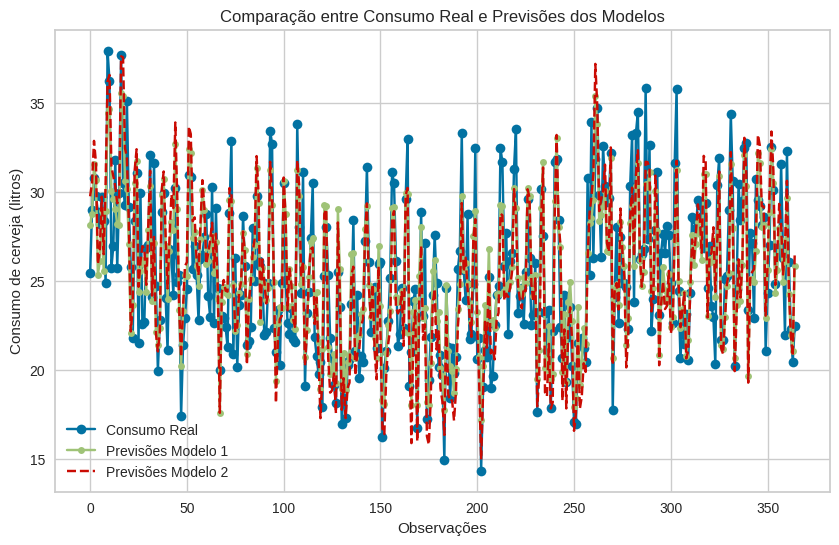

In [63]:
import matplotlib.pyplot as plt

# Crie um gráfico de linhas para comparar as previsões dos dois modelos com os valores reais
plt.figure(figsize=(10, 6))

# Consumo real como uma linha
plt.plot(Predicoes.index, Predicoes['Consumo de cerveja (litros)'], label='Consumo Real', linestyle='-', marker='o', markersize=7)

# Previsões dos modelos
plt.plot(Predicoes.index, Predicoes['Predições 1'], label='Previsões Modelo 1', linestyle='-', marker='o', markersize=5)
plt.plot(Predicoes.index, Predicoes['Predições 2'], label='Previsões Modelo 2', linestyle='--', marker='x', markersize=5)

# Adicione rótulos e legenda
plt.xlabel('Observações')
plt.ylabel('Consumo de cerveja (litros)')
plt.title('Comparação entre Consumo Real e Previsões dos Modelos')
plt.legend()

# Exiba o gráfico
plt.show()


Análise gráfica dos residuos

<ipython-input-65-d5ebcc256c7a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos1,ax=ax[0][1])


<function matplotlib.pyplot.show(close=None, block=None)>

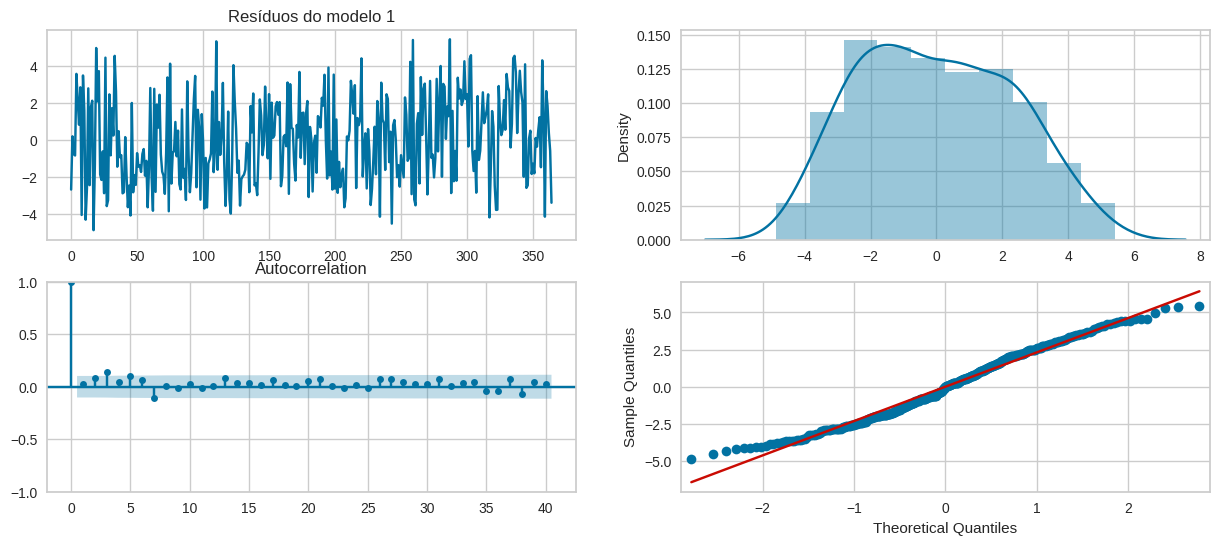

In [65]:
residuos1 = modelo1.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 1", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);


<ipython-input-66-f6f95a7b3788>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos2,ax=ax[0][1])


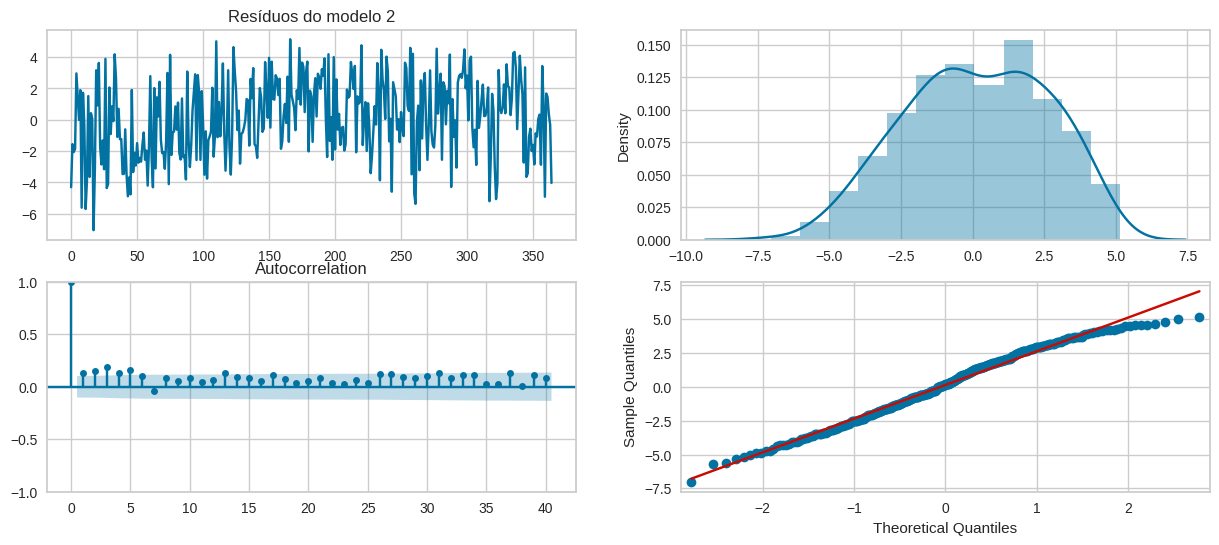

In [66]:
residuos2 = modelo2.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos2.plot(title="Resíduos do modelo 2", ax=ax[0][0])
sns.distplot(residuos2,ax=ax[0][1])
plot_acf(residuos2,lags=40, ax=ax[1][0])
qqplot(residuos2,line='s', ax=ax[1][1]);

### Seguindo analisando o relatório gerado pelo statsmodels, partiremos para a análise residual e verificação de multicolinearidade

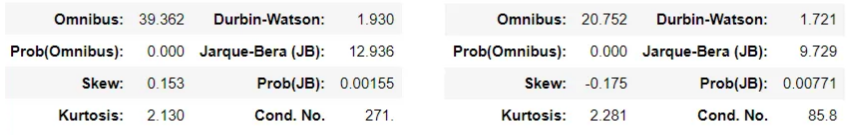

#### Teste Omnibus
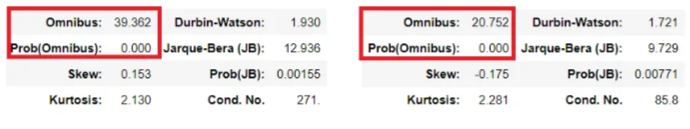

Descreve a normalidade da distribuição de nossos resíduos usando inclinação e curtose como medidas. Um 0 indicaria normalidade perfeita.

### Assimetria e Curtose

Assimetria é uma medida da falta de simetria de uma distribuição de probabilidade, obtida a partir do terceiro momento central. Em uma distribuição normal, a assimetria é igual a zero.

Curtose é uma medida que descreve o achatamento de uma distribuição de probabilidade, obtida do quarto momento central. Em uma distribuição normal, a curtose é igual a 3. Para modelos, é desejável que os dados sigam uma distribuição normal, com assimetria igual a zero e curtose igual a 3.

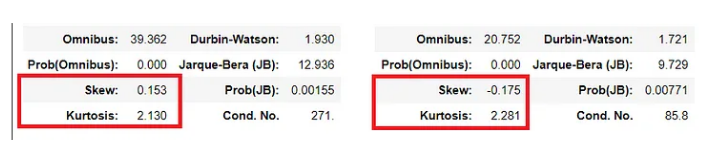

Para os modelos a assimetria está próxima de zero, mas a curtose não está próxima de 3. Pode-se concluir que as distribuições dos erros dos modelos não são normais.

### Multicolinearidade

Número Condição : Se o valor for maior que 900, então há evidência para multicolinearidade. O que como vemos abaixo, não acontece. Ou seja, não há indicios de Multicolinearidade.

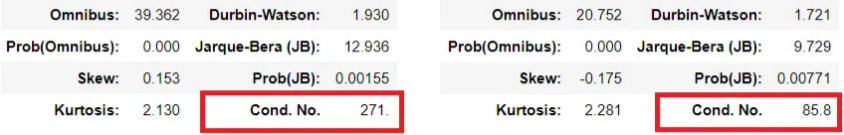

## Heterocidacidade

Violação da suposição de que a variância dos resíduos são constantes.

Para realizar a verificação, realizaremos uma análise gráfica. Porém pode ser ultilizado testes como: Goldfeld-Quandt, Breusch-Pagan e White.

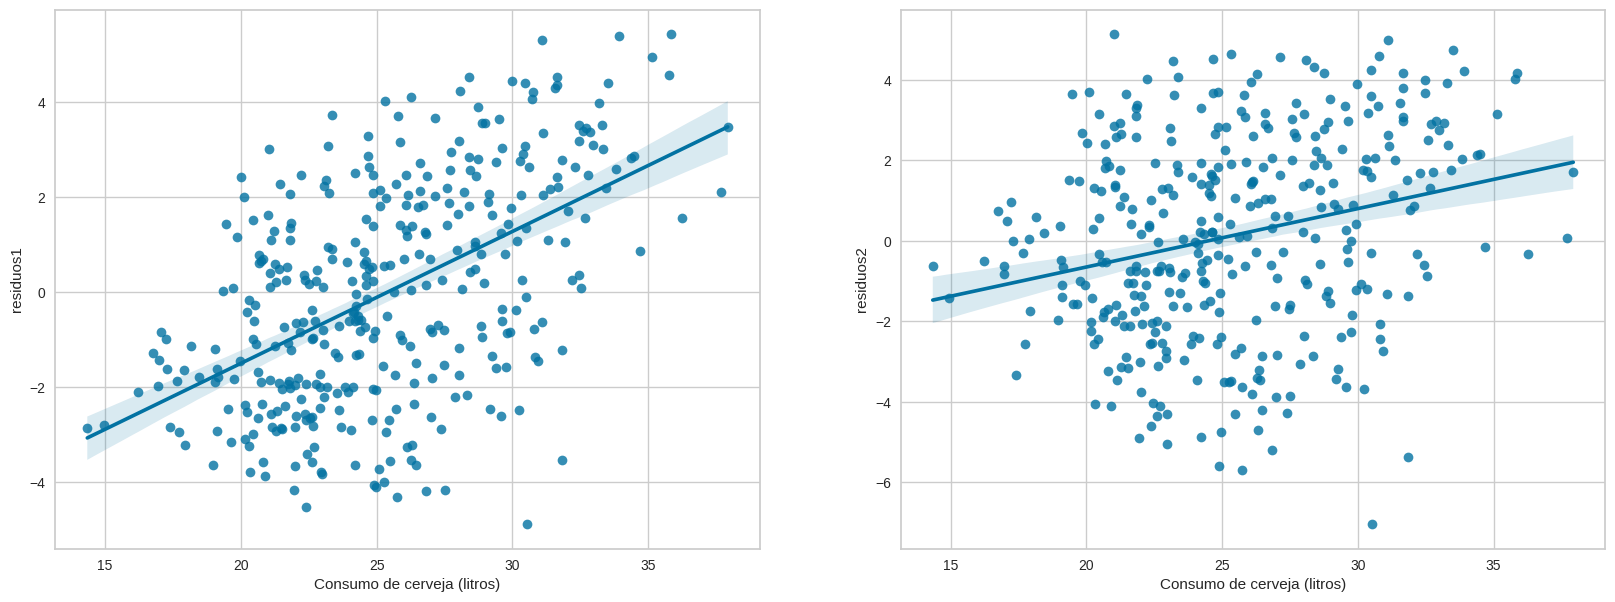

In [68]:
cerveja2 = cerveja_Df
cerveja2['residuos1'] = modelo1.resid
cerveja2['residuos2'] = modelo2.resid

fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.regplot(x='Consumo de cerveja (litros)',y='residuos1',data=cerveja2, ax=ax[0])
sns.regplot(x='Consumo de cerveja (litros)',y='residuos2',data=cerveja2, ax=ax[1]);

Conforme o gráfico acima, a relação entre os resíduos dos modelos e a variável dependente possui uma tendência, logo há uma evidência para presença de heterocedasticidade nos modelos.

# Conclusão

A todo custo o modelo teve bom desempenho em alguns testes e ja em outros não. O que mostra que ainda há problemas que precisam ser tratados e reajustados. No mais, este trabalho contribuiu bastante para a fixação de conceitos, e teste prático dos conhecimentos e habilidades adiquiridos em Estatística.